# GR5074 - Projects in Advanced Machine Learning


## Homework 2: shm2166

In [2]:
#install aimodelshare library
%%capture
! pip install aimodelshare --upgrade

I hash out the dataset below to avoid all the contents coming up below. 

In [1]:
# Download and unpack data
#!pip install --upgrade --no-cache-dir gdown
#!gdown --id 'https://drive.google.com/file/d/1-Ku-fu1X9pge26ZMji_yCKQqWDWbajCV/view?usp=sharing"
#!unzip COVID-19_Radiography_Database.zip 

In [4]:
import os
import sys
import time
import cv2
import matplotlib.pyplot as plt
from itertools import repeat
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import zipfile
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3
from itertools import repeat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image

I hash out the dataset below to avoid all the contents coming up below. 

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#!unzip "/content/gdrive/MyDrive/COVID-19_Radiography_Database.zip.crdownload"

**Citation of paper providing original dataset:**

M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, “Can AI help in screening Viral and COVID-19 pneumonia?” arXiv preprint, 29 March 2020, https://arxiv.org/abs/2003.13145

**Harvard citation:** Chowdhury, M.E., Rahman, T., Khandakar, A., Mazhar, R., Kadir, M.A., Mahbub, Z.B., Islam, K.R., Khan, M.S., Iqbal, A., Al Emadi, N. and Reaz, M.B.I., 2020. Can AI help in screening viral and COVID-19 pneumonia?. IEEE Access, 8, pp.132665-132676.

**Visualize images that demonstrate when x-rays demonstrate Covid Postivity and when they do not (You can present visuals of each category in the data if you would like to.).**

In [6]:
base_path = '/content/COVID-19 Radiography Database'
categories = ['COVID', 'NORMAL', 'Viral Pneumonia']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [1200, 1341, 1345]
[['/content/COVID-19 Radiography Database/COVID/COVID (60).png', '/content/COVID-19 Radiography Database/COVID/COVID (98).png', '/content/COVID-19 Radiography Database/COVID/COVID (371).png', '/content/COVID-19 Radiography Database/COVID/COVID (380).png', '/content/COVID-19 Radiography Database/COVID/COVID (561).png', '/content/COVID-19 Radiography Database/COVID/COVID (140).png', '/content/COVID-19 Radiography Database/COVID/COVID (1194).png', '/content/COVID-19 Radiography Database/COVID/COVID (787).png', '/content/COVID-19 Radiography Database/COVID/COVID (195).png', '/content/COVID-19 Radiography Database/COVID/COVID (1154).png', '/content/COVID-19 Radiography Database/COVID/COVID (799).png', '/content/COVID-19 Radiography Database/COVID/COVID (766).png', '/content/COVID-19 Radiography Database/COVID/COVID (530).png', '/content/COVID-19 Radiography Database/COVID/COVID (224).png', '/content/COVID-19 Radiography Database/COVID/C

In [7]:
def preprocessor(data, shape=(192, 192)):
        img = cv2.imread(data) # Read in image from filepath.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 reads in images in order of blue green and red, we reverse the order for ML.
        #grayscale image?  Use im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, shape) # Change height and width of image.
        img = img / 255.0 # Min-max transform.  

        # Resize the images.
        X = np.array(img)
        #X = np.expand_dims(X, axis=0) # Expand dims to add "1" to object shape [1, h, w, channels] if needed.
        X = np.array(X, dtype=np.float32) # Final shape for onnx runtime.
        return X


In [8]:
image_filepaths=fnames[0]+fnames[1]+fnames[2]
preprocessed_image_data=list(map(preprocessor,image_filepaths ))
X= np.array(preprocessed_image_data)

In [9]:
print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1200))
normal=list(repeat("NORMAL", 1341))
pneumonia=list(repeat("PNEUMONIA", 1345))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas
y=pd.get_dummies(y_labels)

y.head()

number of images for each category: [1200, 1341, 1345]
3886


,COVID,NORMAL,PNEUMONIA
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


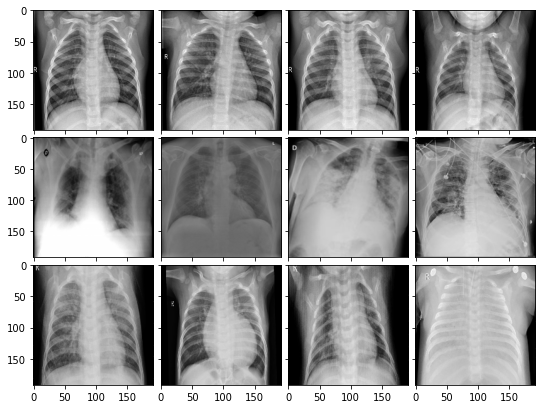

In [10]:
image1 =preprocessor('COVID-19 Radiography Database/NORMAL/NORMAL (1004).png')
image2 =preprocessor('COVID-19 Radiography Database/NORMAL/NORMAL (1011).png')
image3 =preprocessor('COVID-19 Radiography Database/NORMAL/NORMAL (1044).png')
image4 =preprocessor('COVID-19 Radiography Database/NORMAL/NORMAL (1142).png')
image5 =preprocessor('COVID-19 Radiography Database/COVID/COVID (10).png')
image6 =preprocessor('COVID-19 Radiography Database/COVID/COVID (1001).png')
image7 =preprocessor('COVID-19 Radiography Database/COVID/COVID (102).png')
image8 =preprocessor('COVID-19 Radiography Database/COVID/COVID (1091).png')
image9 =preprocessor('COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (100).png')
image10 =preprocessor('COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1009).png')
image11 =preprocessor('COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1019).png')
image12 =preprocessor('COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1051).png')

fig = plt.figure(figsize=(9.,9.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(3, 4),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10, image11, image12]):
    ax.imshow(im)
plt.show()

The first 4 x-ray images show normal lungs. The next 4 images show x-ray images of a covid positive individuals lungs. The last 4 images show x-ray images of an individual who has viral pneumonia. 

Images that show normal lungs do not demonstrate covid positivity. On the other hand, images that show covid related damage in lungs demonstrate covid postivity. These x-ray images shows lungs that are cloudy and blurry. X-ray images that show viral pneumonia shows damaged lungs that are not covid related, and these images of lungs are also quite blurry depicting lung damage. A normal lung X-ray shows much clearer lungs.  

**Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful. Who could benefit from a model like this? Explain.**


This dataset is a public database of images collected from recently published articles. Authors have reported a large dataset of COVID-19 positive chest x-ray images. The normal and viral pnemonia chest x-ray images were more easily available on public datatbases and resources. The authors made a Kaggle datatbase so that worldwide researchers also had access to COVID-19 chest x-ray images. Looking at this database we can see that images of viral pnemonia are quite similar to lungs damaged by COVID-19. Additionally, symptoms of viral pnemonia and covid being quite similar tend to lead to the issue of misdiagnosis.

Building a public database to build predictive models on this database is extremely useful as RT-PCR tests, and setting up RT -PCR labs are expensive   and require trained medical professionals. Additionally these are manual tests and therefore include labour. At the start of the pandemic there was a scarcity of RT-PCR tests available. Therefore, having other reliable methods of detecting COVID-19 are extremely important and would be useful. Using radiological methods such as chest x-rays are vital diagnostic tools for COVID-19. Methods such as chest x-rays are fast and inexpensive to diagnose COVID-19, however this method suffers from lower diagnostic accuracy and can lead to confusion with other deseases such as viral pneumonias. 

Building a predictive model would be highly beneficial, as by applying machine learning models to various chest x-ray images, such methods can be used to improve the accuracy of the diagnosis. These models are able to use large amounts of data to detect and extract enough information to predict accurately. Moreover such models for the most part, are able to effectively learn and distinguish between COVID-19 and pnemonia. 

During the peak of the pandemic, medical services were saturated, therefore using chest x-rays could alleviate the burden on existing medical systems. Such models would positively impact developing countries and developed countries whose medical infrastructure was under great pressure due to the pandemic and positivity rate of people getting infected by COVID-19. These predictive models would create great breakthroughs in medical science and make COVID-19 detection methods more accessible to those in developing countried who do not have instant access to RT-PCR.

The study found that using methods such as Convolutional Neural Networks are succesfully able to extract features and learn, and therefore are being widely used in the research community. CNN works best on larger datasets.
 


**Run at least three prediction models to try to predict x-ray images well. Use transfer learning for at least one of these models**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 1234)
y_test.sum()

COVID        240
NORMAL       269
PNEUMONIA    269
dtype: int64

**MODEL 1**

In the model I assign epochs as 4, and verbose as 1.

In [36]:
with tf.device('/device:GPU:0'): # model172

  model1 = tf.keras.Sequential([    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  
  model1.compile(
    optimizer="adam", 
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  # Fitting the CNN to the Training set
  model1.fit(X_train, y_train, 
                    epochs = 4, verbose=1,validation_data=(X_test,y_test))

Epoch 1/4
98/98 [==============================] - 463s 5s/step - loss: 0.5035 - accuracy: 0.7867 - val_loss: 0.3187 - val_accuracy: 0.8817
Epoch 2/4
98/98 [==============================] - 452s 5s/step - loss: 0.2073 - accuracy: 0.9292 - val_loss: 0.2240 - val_accuracy: 0.9126
Epoch 3/4
98/98 [==============================] - 451s 5s/step - loss: 0.1840 - accuracy: 0.9395 - val_loss: 0.1829 - val_accuracy: 0.9319
Epoch 4/4
98/98 [==============================] - 451s 5s/step - loss: 0.1403 - accuracy: 0.9530 - val_loss: 0.1902 - val_accuracy: 0.9370


**MODEL 2**

In the model below I add a dropout rate of 0.2 , and a learning rate of 0.01, I assign epochs as 3, and verbose as 1.

In [45]:
with tf.device('/device:GPU:0'): 
      opt=SGD(learning_rate=.01)

      model2 = Sequential()
      model2.add(Dense(124,  input_shape=(192, 192, 3), activation='relu'))
      model2.add(Dropout(.2))
      model2.add(Dense(62, activation='relu'))
      model2.add(Dense(36, activation='relu'))
      model2.add(Dropout(.2))
      model2.add(Flatten())
      model2.add(Dense(3, activation='softmax')) 
                                                  
      # Compile model
      model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
      # Fitting the NN to the Training set
      model2.fit(X_train, y_train, 
                    epochs = 3, verbose=1,validation_data=(X_test,y_test))

Epoch 1/3
98/98 [==============================] - 460s 5s/step - loss: 0.7735 - accuracy: 0.6976 - val_loss: 0.5910 - val_accuracy: 0.7339
Epoch 2/3
98/98 [==============================] - 445s 5s/step - loss: 0.3858 - accuracy: 0.8565 - val_loss: 0.6834 - val_accuracy: 0.7853
Epoch 3/3
98/98 [==============================] - 445s 5s/step - loss: 0.2611 - accuracy: 0.9057 - val_loss: 0.2312 - val_accuracy: 0.9203


**MODEL 3**

This is a Transfer Learning model. In the model I add a dropout rate of 0.2 ,  I assign epochs as 3, and verbose as 1.

In [46]:
IMG_SHAPE = (192, 192, 3)
conv_base = InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
freeze_layers_after=10
for layer in conv_base.layers[freeze_layers_after:]:
  layer.trainable =  False

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

      model3 = Sequential()
      model3.add(conv_base)
      model3.add(GlobalAveragePooling2D())
      model3.add(Dense(120, activation='relu'))
      model3.add(Dense(60, activation='relu'))
      model3.add(Dropout(0.2))
      model3.add(Dense(30, activation='relu'))
      model3.add(Flatten())
      model3.add(Dense(3, activation='softmax')) 

      model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 
      model3.fit(X_train, y_train,
          epochs = 3 , verbose=1,validation_data=(X_test,y_test))

87924736/87910968 [==============================] - 1s 0us/step
Epoch 1/3
98/98 [==============================] - 935s 9s/step - loss: 0.3762 - acc: 0.8594 - val_loss: 0.3771 - val_acc: 0.8483
Epoch 2/3
98/98 [==============================] - 928s 9s/step - loss: 0.1877 - acc: 0.9373 - val_loss: 0.2071 - val_acc: 0.9216
Epoch 3/3
98/98 [==============================] - 972s 10s/step - loss: 0.1471 - acc: 0.9514 - val_loss: 0.2151 - val_acc: 0.9319


The val_acc and val_loss metrics on the model get a measure of the quality of your model and how well it is predicting based on the data. The metric val_acc are and val_loss measure the accuracy and loss of the model predicting on the dataset.

Overfitting is a major issue while training a machine learning model. This occurs when your model is able to predict the training data well, however, performs poorly on the test set. To avoid this issue cross-validation is used, and methods such as adding drop out rates to the model. The models results are below. The accuracy score is a percentage, whereas the the loss score is not a percentage as it is a summation of errors.


*   **Model 1**: val_accuracy: 0.9370 , val_loss: 0.1902
*   **Model 2**: val_accuracy: 0.9203 , val_loss: 0.2312
*   **Model 3**: val_accuracy: 0.9310 , val_loss: 0.2151


**Discuss which models performed better and point out relevant hyper-parameter values for successful models.**


In the first model I use 'relu' as the activation function, and in the last layer I use 'softmax' as the activation function. I set verbose as 1 and use 4 epochs. I perform cross validation. The accuracy score is 0.9370, and the loss score of 0.1902. The overall increase of the accuracy score and fall of the loss score is a good sign indicating that the model is learning from the data and is predicting better. 

In the second model I use 'relu' as the activation function, and in the last layer I use 'softmax' as the activation function. I add a dropout rate of 0.2. I set verbose as 1 and use 3 epochs. I set the learning rate as 0.01 and perform cross validation. The model has an accuracy score of 0.9203 and loss score of 0.2312. The accuracy score increases as the model runs over each epoch. The loss score decreases, increases and then finally decreases. Despite the change in direction of the loss score, the overall increase of the accuracy score and fall of the loss score is a good sign that the model is successfully learning. 

In the third model I use transfer learning. I assign freeze_layers_after at 10. I use 'relu' as the activation function, and in the last layer I use 'softmax'. I add a dropout rate of 0.2. I set verbose as 1 and use 3 epochs. After performing cross validation the accuracy score is 0.9319 and the loss score is 0.2151.

Typically hyper parameters that are used are the following: 


*   Number of hidden layers: These are the number of layers the neural network has, and can be tuned in accordance to the model. 
*   Learning rate: This hyperparameter controls the step size for a model to arrive at its minimum loss function, which is how quickly the model adapts tp the problem. If the leraning rate is too large, then the model may converge before it reached the optimal solution. If its too small then the model may not work properly. 
*   Activation function: This fucntion is passed through the weighted sum. There are three activation fucntions; relu, sigmoid and softmax
*   Epochs: The number of times the data is passed through the neural network model. One epoch means that the training dataset is passed forward and backward through the model once.
*   Batch Size: The batch size is when smaller samples of data are propagated through the model. 
*   Dropout rate: The dropout rate is is a hyperparameter used to regularize the model. The connections between consecutive layers are randomly based on a dropout ratio. 

The model that performs the best is Model 1. This model has the highest accuracy score and the lowest loss score. Models that perform well use the relu activation function. The aim is to have the highest accuracy score. The lower the loss, the better a model. Model 1 has the highest accuracy score and the lowest loss score. The best performing model had a greater number of epochs than the other models so this could have contributed to a higher accuracy score. Moreover, Model 1 also had a dropout rate which also played a role in it performing better than the other models. 



**Submit your best model to the leader board for the COVID Image Classification Hackathon competition.**

**aimodelshare**

In [67]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

can't pickle module objects
Your preprocessor is now saved to 'preprocessor.zip'


In [68]:
#Instantiate Competition 
mycompetition= ai.Competition("https://79ei37u6vf.execute-api.us-east-1.amazonaws.com/prod/m")

In [69]:
apiurl="https://79ei37u6vf.execute-api.us-east-1.amazonaws.com/prod/m" # example url from deployed playground: apiurl= "https://123456.execute-api.us-east-1.amazonaws.com/prod/m

import aimodelshare
aimodelshare.aws.set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [74]:
# Save Model to .onnx file
from aimodelshare.aimsonnx import model_to_onnx

# Save tf.keras model to ONNX file
onnx_model = model_to_onnx(model1, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

# Save model to local .onnx file
with open("model1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString()) 

In [75]:
# using predict_classes() for multi-class data to return predicted class index.

def predict_classes(x): # adjusted from keras github code
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(model1.predict(X_test)))

prediction_index=predict_classes(model1.predict(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method
prediction_labels=list(map(lambda x: labels[x], prediction_index))

[2 1 2 1 1 1 2 2 0 1 1 2 2 2 0 1 1 2 2 1 0 1 0 1 2 1 2 2 1 2 1 2 1 1 1 1 1
 2 2 0 0 2 2 2 0 0 2 1 1 0 1 1 1 2 0 0 1 0 0 0 2 2 0 1 2 1 0 0 0 1 0 0 1 2
 1 2 2 2 2 2 1 1 2 2 2 2 0 0 2 2 0 1 1 0 1 0 1 1 2 1 0 1 0 0 2 0 1 2 0 2 0
 2 1 1 0 1 1 1 2 2 2 2 1 2 0 0 1 0 1 1 0 2 0 2 0 0 2 2 1 2 1 1 2 2 0 2 1 0
 0 1 2 0 0 1 1 0 0 0 1 2 2 1 1 0 0 2 2 1 1 1 0 0 0 0 1 2 1 1 0 0 2 2 0 2 2
 1 1 1 1 2 2 0 1 1 1 2 1 2 2 2 1 0 0 2 0 1 2 2 1 2 0 2 2 1 0 2 1 0 1 2 1 1
 0 1 1 2 1 0 0 1 0 1 2 2 1 1 1 0 1 2 1 1 0 0 0 2 2 2 2 1 2 1 2 2 0 2 1 1 2
 0 1 2 1 0 0 0 1 1 0 0 1 2 2 2 2 1 1 2 0 2 1 2 1 0 0 0 1 0 0 2 2 0 1 1 1 0
 0 1 1 1 2 1 2 1 2 1 1 0 1 0 0 0 1 2 1 1 0 0 1 1 1 1 2 2 2 2 1 1 2 2 1 1 1
 2 1 2 2 0 1 1 2 0 0 0 2 2 1 0 0 2 0 2 1 0 0 0 1 2 0 1 2 1 1 0 2 1 1 0 0 2
 0 0 0 1 2 2 1 0 2 1 2 2 1 2 0 1 1 1 1 2 2 0 1 2 0 1 2 0 0 0 1 1 1 1 0 2 1
 0 2 1 0 1 1 2 1 0 1 2 1 1 0 2 1 1 1 1 0 0 2 2 0 1 2 0 2 0 0 0 2 1 0 2 0 2
 0 0 2 2 2 0 2 1 1 1 1 2 2 2 0 1 1 0 1 1 1 1 0 2 2 1 0 1 0 2 2 2 0 2 0 2 1
 1 0 1 0 2 2 0 2 2 0 0 1 

In [76]:
# Submit Model 1 to Competition Leaderboard
mycompetition= ai.Competition(apiurl)
mycompetition.submit_model(model_filepath = "model1.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): ggg
Provide any useful notes about your model (optional): gg

Your model has been submitted as model version 178

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1539


**AI modelshare handle: shm 2166**


**Model Version: 172**

**Import the best model from the leader board (whatever the best model is after your final submission) Note: Use the aimodelshare instantiate_model() function**. **Visualize the model's structure using tf.keras model.summary()**

Get Leaderboard

In [77]:
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

Check structure of y test data

In [65]:
mycompetition.inspect_y_test()

{'class_balance': {'COVID': 240, 'NORMAL': 269, 'PNEUMONIA': 269},
 'class_labels': ['PNEUMONIA', 'NORMAL', 'COVID'],
 'label_dtypes': {"<class 'str'>": 778},
 'y_length': 778,
 'ytest_example': ['PNEUMONIA', 'NORMAL', 'COVID', 'NORMAL', 'PNEUMONIA']}

In [89]:
# instantiate the best model on the leaderboard
# 71 was the best model on the leaderboard when I did this part of the assignment.
best_model = mycompetition.instantiate_model(71)
best_model.summary()

Instantiate the model from metadata..
Your model is successfully instantiated.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 192, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 32)      1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        4160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48

In [88]:
# instantiate the MY best performing model on the leaderboard
best_model_mine = mycompetition.instantiate_model(172)
best_model_mine.summary()

Instantiate the model from metadata..
Your model is successfully instantiated.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 192, 192, 32)      896       
                                                                 
 conv2d_33 (Conv2D)          (None, 192, 192, 32)      1056      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 96, 96, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 96, 96, 64)        4160      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 

In [90]:
# Compare two or more models (Experimental, Git-like Diffs for Model Architectures)
# I compare my best model (172) with the best perfomring model on the leaderboard (71)
data=mycompetition.compare_models([172,71], verbose=1)
mycompetition.stylize_compare(data)

,Model_172_Layer,Model_172_Shape,Model_172_Params,Model_71_Layer,Model_71_Shape,Model_71_Params
0,Conv2D,"[None, 192, 192, 32]",896,Conv2D,"[None, 192, 192, 32]",896.000000
1,Conv2D,"[None, 192, 192, 32]",1056,Conv2D,"[None, 192, 192, 32]",1056.000000
2,MaxPooling2D,"[None, 96, 96, 32]",0,MaxPooling2D,"[None, 96, 96, 32]",0.000000
3,Conv2D,"[None, 96, 96, 64]",18496,Conv2D,"[None, 96, 96, 64]",18496.000000
4,Conv2D,"[None, 96, 96, 64]",4160,Conv2D,"[None, 96, 96, 64]",4160.000000
5,MaxPooling2D,"[None, 48, 48, 64]",0,MaxPooling2D,"[None, 48, 48, 64]",0.000000
6,Dropout,"[None, 48, 48, 64]",0,Conv2D,"[None, 48, 48, 128]",73856.000000
7,Conv2D,"[None, 48, 48, 128]",73856,Conv2D,"[None, 48, 48, 128]",16512.000000
8,Conv2D,"[None, 48, 48, 128]",16512,MaxPooling2D,"[None, 24, 24, 128]",0.000000
9,MaxPooling2D,"[None, 24, 24, 128]",0,Conv2D,"[None, 24, 24, 512]",590336.000000


 **Explain how the model's structure is different from your best model. Explain how the model's optimization approach is different from your best model**

Both models are Neural Networks. The optimizer model 71 uses adam and uses categorical crossentropy as loss. The optimizers that I use for model 172 also use adam as an optimizer and uses categorical crossentropy as loss.

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of different algorithms to provide an optimization algorithm. Adam is also relatively easy to configure and use and does well on most parameteres. 

Model 71 is different from my model as it does not use a dropout rate, whereas in my model I do use a drop out rate. Both models have the same number of max pooling layers, however with different values. Both models have a similar structure and the same number of max pooling layers. My model has a drop out rate, whereas the best model does not. The structure differs with the amount of layers the neural network has, as my model has more layers than the best performing model. Moreover, I use drop out rate as a way to prevent overfitting of the model, whereas the best model does not use that. 

**Fit the best model from the leader board to training data and evaluate it on test data to complete your report.**

In [91]:
best_model.compile(optimizer='adam', 
                             loss= 'categorical_crossentropy',
                             metrics=['accuracy'])
history = best_model.fit(X_train, y_train, 
                    epochs = 1, verbose=1,validation_data=(X_test,y_test))

98/98 [==============================] - 465s 5s/step - loss: 0.5012 - accuracy: 0.7777 - val_loss: 0.2223 - val_accuracy: 0.9177


After fitting the best model the accuracy score is 0.9177 and the loss score is 0.2223